# Building a Basic Circuit.
Follow this notebook to create a basic circuit.

## Create the circuit.

In [1]:
#Begin with some simple imports
import numpy as np
from qiskit import *

Now creating a `QuantumCircuit` object, of 3 qubits.

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

Now we want to add some gates to the quantum circuit, to make what's known as the three-qubit GHZ state:
\begin{equation}
|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.
\end{equation}
By default, every qubit in the register is initialized to $|0\rangle$.

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

Qiskit will draw your circuit when you run `QuantumCircuit.draw()`. The `'mpl'` argument draws the circuit in a nice way.

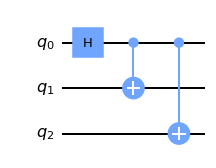

In [4]:
circ.draw('mpl')

## Simulate the circuit.

### Statevector Backend:

The `statevector_simulator` returns the statevector for the circuit, i.e. a $2^n$ complex vector, for $n$ qubits.

In [5]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

Now compile & run the quantum circuit. This is done by running the `execute` function, which then returns a `job` object. The `job` object contains information about the backend. 

The `result` object contains the data, which we extract with the `get_statevector(circ)` function.

In [6]:
# Create a Quantum Program for execution 
job = backend.run(circ)

# Get the state vector for the quantum circuit
outstate = job.result().get_statevector(circ)

### Unitary Backend:
`unitary_simulator` calculates a $2^n \times 2^n$ matrix representing the quantum circuit *provided all elements in the circuit are unitary operations*.

In [7]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

### OpenQASM Backend:
We now want to simulate a *measurement* of the qubits in the register, i.e. what we would see coming from a real quantum computer.
Recall that if we prepare a quantum state $|\psi\rangle$, the probability of obtaining the outcome $|011\rangle$ from our measurement is:
\begin{equation}
P_{011} = |\langle011|\psi\rangle|^2.
\end{equation}
For the GHZ state, the probability of obtaining 011 is 0.

Now add a 3 qubit classical register, and map the three qubit measurements to the classical bits.

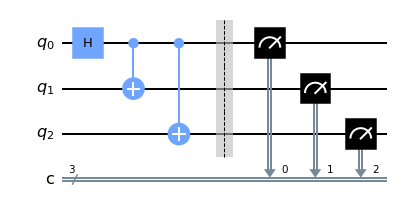

In [8]:
# Create a Quantum Circuit with 3 quantum bits & 3 classical bits.
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw('mpl')

In [9]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Now we access the counts from the circuit via `get_counts(qc)`. We can plot this in a nice histogram with `plot_histogram`:

{'000': 513, '111': 511}


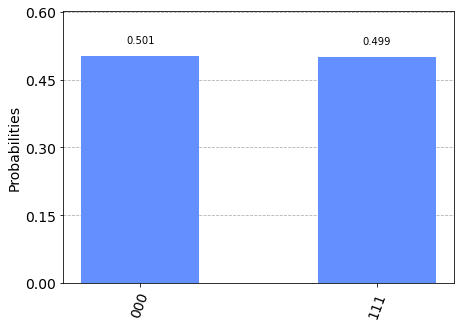

In [10]:
from qiskit.visualization import plot_histogram

counts = result_sim.get_counts(qc)
print(counts)

plot_histogram(counts)

Now you're done, go to `jupyter notebook part2_notebook.ipynb` to see your next set of instructions.